In [4]:
import matplotlib.pyplot as plt
import loompy
import numpy as np

fbpc_cells = 'Recombined3Clean2_C_FBPC.loom'
human_adult_harmony_B_H_cells ='HumanAdult_harmony_B_H_Clean.loom'

In [5]:
from neftel_states import NeftelStates

In [6]:
#Meningioma genes
geneset1 = np.array(['NF2','TRAF7','AKT1','KLF4','KMT2C','EGFR','TSC2','LRP1B','SMO','LZTR1','APC','PRKAR1A','TERT',
                     'MET','SMARCA4','NF1', 'NOTCH1','PREX2','ROS1','KDM6A'])
genesets = [geneset1]

d = loompy.connect(fbpc_cells, "r")
nf = NeftelStates(genesets)

# Run 10 times and average scores
num_runs = 10
scores_sum = None

for _ in range(num_runs):
    scores = nf.fit(d)  
    if scores_sum is None:
        scores_sum = np.zeros_like(scores)  # Initialize sum matrix with the same shape
    scores_sum += scores

average_scores = scores_sum / num_runs 

Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computi

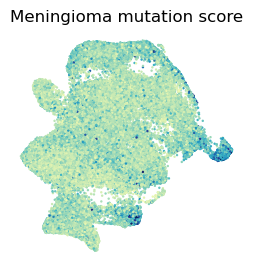

In [7]:
plt.figure(None, (3,3))
with loompy.connect(fbpc_cells, 'r') as ds:
    plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], c=average_scores, cmap='YlGnBu',vmax=np.percentile(scores, 99.9), s=3, lw=0, rasterized=True) #, cmap='hot_r', rasterized=True
    plt.axis('off')
    plt.title('Meningioma mutation score', fontsize=12)
    plt.margins(0.05, 0.05)
    #plt.savefig('neftel_plot_FBPC_menO_p999_average.png',dpi=300)
    plt.show()

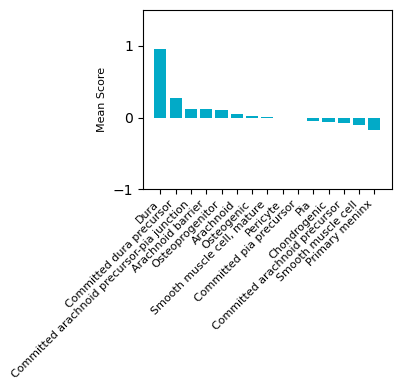

In [9]:
# List of subclasses to plot
subclasses_to_plot = [
    'Arachnoid', 'Arachnoid barrier', 'Chondrogenic', 'Committed arachnoid precursor',
    'Committed arachnoid precursor-pia junction', 'Committed dura precursor',
    'Committed pia precursor', 'Dura', 'Osteogenic', 'Osteoprogenitor', 'Pericyte', 'Pia', 'Primary meninx', 
    'Smooth muscle cell','Smooth muscle cell, mature'
]

with loompy.connect(fbpc_cells, 'r') as ds:
    scores = average_scores.flatten()  # Flatten the scores array to 1D
    subclasses = ds.ca.Subclass
    
    means_by_subclass = {}  # Dictionary to store mean scores for each subclass
    
    for subclass in subclasses_to_plot: 
        subclass_scores = scores[subclasses == subclass]  # Filter scores for this subclass
        mean_value = np.mean(subclass_scores)  # Calculate the mean for this subclass
        means_by_subclass[subclass] = mean_value  # Store the mean in the dictionary

# Sort the dictionary by mean score in descending order
sorted_means_by_subclass = sorted(means_by_subclass.items(), key=lambda x: x[1], reverse=True)
sorted_subclasses, sorted_mean_scores = zip(*sorted_means_by_subclass)

# Plotting the normalized bar plot for the selected subclasses
plt.figure(figsize=(4, 4))
plt.bar(sorted_subclasses, sorted_mean_scores, color='#02AAC7')
plt.ylabel('Mean Score', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylim(-1, 1.5)
plt.yticks(np.arange(-1, 2, 1))
plt.tight_layout()
#plt.savefig('neftel_plots_FBPC_menO_bar_average.png',dpi=300)
plt.show()

In [10]:
# removed overlapping genes
MenO_GBM = ['NF2','TRAF7','AKT1','KLF4','TSC2','SMO','LZTR1','APC','PRKAR1A','MET','SMARCA4','NOTCH1','PREX2','ROS1','KDM6A']
GBM = ['TP53','IDH1','PTEN','H3F3A','PIK3CA','ATRX','BRAF','RB1','PIK3R1','PDGFRA','CHEK2','SETD2','STAG2','FAT1','PTPRT']

MenO_IC = ['NF2','TRAF7','AKT1','KLF4','TSC2','LRP1B','SMO','LZTR1','PRKAR1A','TERT', 'MET','SMARCA4','NF1','NOTCH1','PREX2','ROS1','KDM6A']
Intest_carc = ['KRAS','TP53','PIK3CA','TGFBR2','ERBB2','BRAF','ACVR2A','SMAD4','KMT2D','ATM','MSH6','FBXW7','GNAS','CTNNB1','ERBB4','ERBB3','ARID2']

MenO_PAC = ['NF2','TRAF7','AKT1','KLF4','EGFR','TSC2','SMO','LZTR1','APC','PRKAR1A','TERT', 'MET','SMARCA4','NF1','NOTCH1','PREX2','ROS1','KDM6A']
Pros_adenocarc = ['TP53','ERBB4','ZFHX3','PTPRT','FHIT','GRIN2A','CAMTA1','PTEN','ALK','RAD51B','SPOP','FOXP1','LPP','PRDM16','AFF3','AR','FOXA1','ESR1']


In [11]:
geneset1 = GBM
genesets = [geneset1]

d = loompy.connect(fbpc_cells, "r")
nf = NeftelStates(genesets)

# Run 10 times and average scores
num_runs = 10
scores_sum = None

for _ in range(num_runs):
    scores2 = nf.fit(d)  
    if scores_sum is None:
        scores_sum = np.zeros_like(scores2)  # Initialize sum matrix with the same shape
    scores_sum += scores2

average_scores2 = scores_sum / num_runs 

Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computi

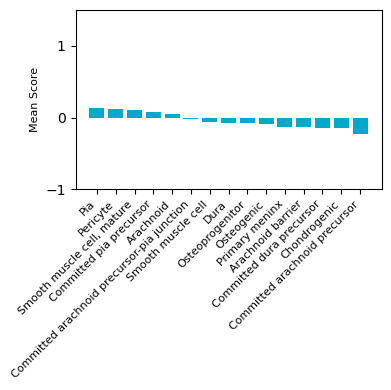

In [12]:
# List of subclasses to plot
subclasses_to_plot = [
    'Arachnoid', 'Arachnoid barrier', 'Chondrogenic', 'Committed arachnoid precursor',
    'Committed arachnoid precursor-pia junction', 'Committed dura precursor',
    'Committed pia precursor', 'Dura', 'Osteogenic', 'Osteoprogenitor', 'Pericyte', 'Pia', 'Primary meninx', 
    'Smooth muscle cell','Smooth muscle cell, mature'
]

with loompy.connect(fbpc_cells, 'r') as ds:
    scores = average_scores2.flatten()  # Flatten the scores array to 1D
    subclasses = ds.ca.Subclass
    
    means_by_subclass = {}  # Dictionary to store mean scores for each subclass
    
    for subclass in subclasses_to_plot:  # Loop over the specified subclasses
        subclass_scores = scores[subclasses == subclass]  # Filter scores for this subclass
        mean_value = np.mean(subclass_scores)  # Calculate the mean for this subclass
        means_by_subclass[subclass] = mean_value  # Store the mean in the dictionary

# Sort the dictionary by mean score in descending order
sorted_means_by_subclass = sorted(means_by_subclass.items(), key=lambda x: x[1], reverse=True)
sorted_subclasses, sorted_mean_scores = zip(*sorted_means_by_subclass)

# Plotting the normalized bar plot for the selected subclasses
plt.figure(figsize=(4, 4))
plt.bar(sorted_subclasses, sorted_mean_scores, color='#02AAC7')
plt.ylabel('Mean Score', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylim(-1, 1.5)
plt.yticks(np.arange(-1, 2, 1))

plt.tight_layout()
#plt.savefig('neftel_plot_FBPC_GBM_bar_average.png',dpi=300)
plt.show()

In [13]:
geneset1 = MenO_GBM
genesets = [geneset1]

d = loompy.connect(fbpc_cells, "r")
nf = NeftelStates(genesets)

# Run 10 times and average scores
num_runs = 10
scores_sum = None

for _ in range(num_runs):
    scores3 = nf.fit(d)  
    if scores_sum is None:
        scores_sum = np.zeros_like(scores3)  # Initialize sum matrix with the same shape
    scores_sum += scores3

average_scores3 = scores_sum / num_runs 

Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computi

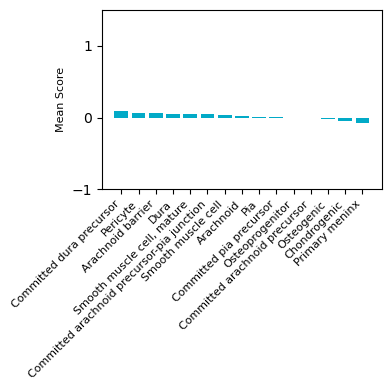

In [14]:
# List of subclasses to plot
subclasses_to_plot = [
    'Arachnoid', 'Arachnoid barrier', 'Chondrogenic', 'Committed arachnoid precursor',
    'Committed arachnoid precursor-pia junction', 'Committed dura precursor',
    'Committed pia precursor', 'Dura', 'Osteogenic', 'Osteoprogenitor', 'Pericyte', 'Pia', 'Primary meninx', 
    'Smooth muscle cell','Smooth muscle cell, mature'
]

with loompy.connect(fbpc_cells, 'r') as ds:
    scores = average_scores3.flatten()  # Flatten the scores array to 1D
    subclasses = ds.ca.Subclass
    
    means_by_subclass = {}  # Dictionary to store mean scores for each subclass
    
    for subclass in subclasses_to_plot:  # Loop over the specified subclasses
        subclass_scores = scores[subclasses == subclass]  # Filter scores for this subclass
        mean_value = np.mean(subclass_scores)  # Calculate the mean for this subclass
        means_by_subclass[subclass] = mean_value  # Store the mean in the dictionary

# Sort the dictionary by mean score in descending order
sorted_means_by_subclass = sorted(means_by_subclass.items(), key=lambda x: x[1], reverse=True)
sorted_subclasses, sorted_mean_scores = zip(*sorted_means_by_subclass)

# Plotting the normalized bar plot for the selected subclasses
plt.figure(figsize=(4, 4))
plt.bar(sorted_subclasses, sorted_mean_scores, color='#02AAC7')
plt.ylabel('Mean Score', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylim(-1, 1.5)
plt.yticks(np.arange(-1, 2, 1))
plt.tight_layout()
#plt.savefig('neftel_plot_FBPC_MenO-GBM_bar_average.png',dpi=300)
plt.show()

In [15]:
geneset1 = Intest_carc
genesets = [geneset1]

d = loompy.connect(fbpc_cells, "r")
nf = NeftelStates(genesets)

# Run 10 times and average scores
num_runs = 10
scores_sum = None

for _ in range(num_runs):
    scores4 = nf.fit(d)  
    if scores_sum is None:
        scores_sum = np.zeros_like(scores4)  # Initialize sum matrix with the same shape
    scores_sum += scores4

average_scores4 = scores_sum / num_runs 

Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computi

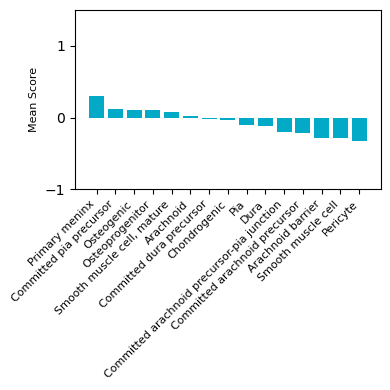

In [16]:
# List of subclasses to plot
subclasses_to_plot = [
    'Arachnoid', 'Arachnoid barrier', 'Chondrogenic', 'Committed arachnoid precursor',
    'Committed arachnoid precursor-pia junction', 'Committed dura precursor',
    'Committed pia precursor', 'Dura', 'Osteogenic', 'Osteoprogenitor', 'Pericyte', 'Pia', 'Primary meninx', 
    'Smooth muscle cell','Smooth muscle cell, mature'
]

with loompy.connect(fbpc_cells, 'r') as ds:
    scores = average_scores4.flatten()  # Flatten the scores array to 1D
    subclasses = ds.ca.Subclass
    
    means_by_subclass = {}  # Dictionary to store mean scores for each subclass
    
    for subclass in subclasses_to_plot:  # Loop over the specified subclasses
        subclass_scores = scores[subclasses == subclass]  # Filter scores for this subclass
        mean_value = np.mean(subclass_scores)  # Calculate the mean for this subclass
        means_by_subclass[subclass] = mean_value  # Store the mean in the dictionary

# Sort the dictionary by mean score in descending order
sorted_means_by_subclass = sorted(means_by_subclass.items(), key=lambda x: x[1], reverse=True)
sorted_subclasses, sorted_mean_scores = zip(*sorted_means_by_subclass)

# Plotting the normalized bar plot for the selected subclasses
plt.figure(figsize=(4, 4))
plt.bar(sorted_subclasses, sorted_mean_scores, color='#02AAC7')
plt.ylabel('Mean Score', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylim(-1, 1.5)
plt.yticks(np.arange(-1, 2, 1))
plt.tight_layout()
#plt.savefig('neftel_plot_FBPC_IC-MenO_bar_average.png',dpi=300)
plt.show()

In [17]:
geneset1 = MenO_IC
genesets = [geneset1]

d = loompy.connect(fbpc_cells, "r")
nf = NeftelStates(genesets)

# Run 10 times and average scores
num_runs = 10
scores_sum = None

for _ in range(num_runs):
    scores5 = nf.fit(d)  
    if scores_sum is None:
        scores_sum = np.zeros_like(scores5)  # Initialize sum matrix with the same shape
    scores_sum += scores5

average_scores5 = scores_sum / num_runs 

Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computi

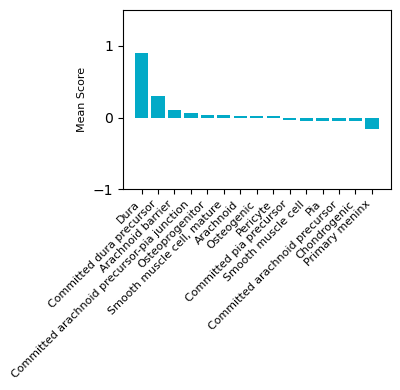

In [19]:
# List of subclasses to plot
subclasses_to_plot = [
    'Arachnoid', 'Arachnoid barrier', 'Chondrogenic', 'Committed arachnoid precursor',
    'Committed arachnoid precursor-pia junction', 'Committed dura precursor',
    'Committed pia precursor', 'Dura', 'Osteogenic', 'Osteoprogenitor', 'Pericyte', 'Pia', 'Primary meninx', 
    'Smooth muscle cell','Smooth muscle cell, mature'
]

with loompy.connect(fbpc_cells, 'r') as ds:
    scores = average_scores5.flatten()  # Flatten the scores array to 1D
    subclasses = ds.ca.Subclass
    
    means_by_subclass = {}  # Dictionary to store mean scores for each subclass
    
    for subclass in subclasses_to_plot:  # Loop over the specified subclasses
        subclass_scores = scores[subclasses == subclass]  # Filter scores for this subclass
        mean_value = np.mean(subclass_scores)  # Calculate the mean for this subclass
        means_by_subclass[subclass] = mean_value  # Store the mean in the dictionary

# Sort the dictionary by mean score in descending order
sorted_means_by_subclass = sorted(means_by_subclass.items(), key=lambda x: x[1], reverse=True)
sorted_subclasses, sorted_mean_scores = zip(*sorted_means_by_subclass)

# Plotting the normalized bar plot for the selected subclasses
plt.figure(figsize=(4, 4))
plt.bar(sorted_subclasses, sorted_mean_scores, color='#02AAC7')
plt.ylabel('Mean Score', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylim(-1, 1.5)
plt.yticks(np.arange(-1, 2, 1))
plt.tight_layout()
#plt.savefig('neftel_plots_FBPC_MenO-IC_bar_average.png',dpi=300)
plt.show()

In [ ]:
geneset1 = Pros_adenocarc
genesets = [geneset1]

d = loompy.connect(fbpc_cells, "r")
nf = NeftelStates(genesets)

# Run 10 times and average scores
num_runs = 10
scores_sum = None

for _ in range(num_runs):
    scores6 = nf.fit(d)  
    if scores_sum is None:
        scores_sum = np.zeros_like(scores6)  # Initialize sum matrix with the same shape
    scores_sum += scores6

average_scores6 = scores_sum / num_runs 

In [ ]:
# List of subclasses to plot
subclasses_to_plot = [
    'Arachnoid', 'Arachnoid barrier', 'Chondrogenic', 'Committed arachnoid precursor',
    'Committed arachnoid precursor-pia junction', 'Committed dura precursor',
    'Committed pia precursor', 'Dura', 'Osteogenic', 'Osteoprogenitor', 'Pericyte', 'Pia', 'Primary meninx', 
    'Smooth muscle cell','Smooth muscle cell, mature'
]

with loompy.connect(fbpc_cells, 'r') as ds:
    scores = average_scores6.flatten()  # Flatten the scores array to 1D
    subclasses = ds.ca.Subclass
    
    means_by_subclass = {}  # Dictionary to store mean scores for each subclass
    
    for subclass in subclasses_to_plot:  # Loop over the specified subclasses
        subclass_scores = scores[subclasses == subclass]  # Filter scores for this subclass
        mean_value = np.mean(subclass_scores)  # Calculate the mean for this subclass
        means_by_subclass[subclass] = mean_value  # Store the mean in the dictionary

# Sort the dictionary by mean score in descending order
sorted_means_by_subclass = sorted(means_by_subclass.items(), key=lambda x: x[1], reverse=True)
sorted_subclasses, sorted_mean_scores = zip(*sorted_means_by_subclass)

# Plotting the normalized bar plot for the selected subclasses
plt.figure(figsize=(4, 4))
plt.bar(sorted_subclasses, sorted_mean_scores, color='#02AAC7')
plt.ylabel('Normalized Mean Score', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylim(-1, 1.5)
plt.yticks(np.arange(-1, 2, 1))
plt.tight_layout()
#plt.savefig('neftel_plot_FBPC_PAC-MenO_bar_average.png',dpi=300)
plt.show()

In [24]:
geneset1 = MenO_PAC
genesets = [geneset1]

d = loompy.connect(fbpc_cells, "r")
nf = NeftelStates(genesets)

# Run 10 times and average scores
num_runs = 10
scores_sum = None

for _ in range(num_runs):
    scores7 = nf.fit(d)  
    if scores_sum is None:
        scores_sum = np.zeros_like(scores7)  # Initialize sum matrix with the same shape
    scores_sum += scores7

average_scores7 = scores_sum / num_runs 

Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 33538 genes
Loaded expression matrix (33538 x 78812) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computi

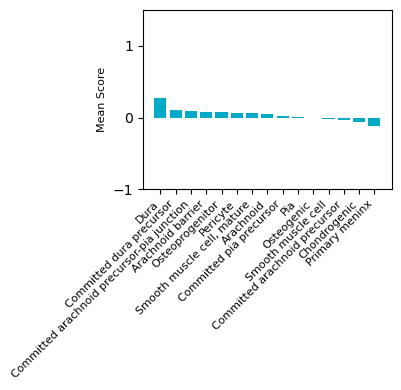

In [25]:
# List of subclasses to plot
subclasses_to_plot = [
    'Arachnoid', 'Arachnoid barrier', 'Chondrogenic', 'Committed arachnoid precursor',
    'Committed arachnoid precursor-pia junction', 'Committed dura precursor',
    'Committed pia precursor', 'Dura', 'Osteogenic', 'Osteoprogenitor', 'Pericyte', 'Pia', 'Primary meninx', 
    'Smooth muscle cell','Smooth muscle cell, mature'
]

with loompy.connect(fbpc_cells, 'r') as ds:
    scores = average_scores7.flatten()  # Flatten the scores array to 1D
    subclasses = ds.ca.Subclass
    
    means_by_subclass = {}  # Dictionary to store mean scores for each subclass
    
    for subclass in subclasses_to_plot:  # Loop over the specified subclasses
        subclass_scores = scores[subclasses == subclass]  # Filter scores for this subclass
        mean_value = np.mean(subclass_scores)  # Calculate the mean for this subclass
        means_by_subclass[subclass] = mean_value  # Store the mean in the dictionary

# Sort the dictionary by mean score in descending order
sorted_means_by_subclass = sorted(means_by_subclass.items(), key=lambda x: x[1], reverse=True)
sorted_subclasses, sorted_mean_scores = zip(*sorted_means_by_subclass)

# Plotting the normalized bar plot for the selected subclasses
plt.figure(figsize=(4, 4))
plt.bar(sorted_subclasses, sorted_mean_scores, color='#02AAC7')
plt.ylabel('Mean Score', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylim(-1, 1.5)
plt.yticks(np.arange(-1, 2, 1))
plt.tight_layout()
#plt.savefig('neftel_plot_FBPC_MenO-PAC_bar_average.png',dpi=300)
plt.show()

## Human adult meninges

In [36]:
#Meningioma genes
geneset1 = np.array(['NF2','TRAF7','AKT1','KLF4','KMT2C','EGFR','TSC2','LRP1B','SMO','LZTR1','APC','PRKAR1A','TERT',
                     'MET','SMARCA4','NF1', 'NOTCH1','PREX2','ROS1','KDM6A'])
genesets = [geneset1]

d = loompy.connect(human_adult_harmony_B_H_cells, 'r')
nf = NeftelStates(genesets)

# Run 10 times and average scores
num_runs = 10
scores_sum = None

for _ in range(num_runs):
    scores8 = nf.fit(d)  
    if scores_sum is None:
        scores_sum = np.zeros_like(scores8)  # Initialize sum matrix with the same shape
    scores_sum += scores8

average_scores8 = scores_sum / num_runs 

Loaded 59480 genes
Loaded expression matrix (59480 x 9156) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 59480 genes
Loaded expression matrix (59480 x 9156) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 59480 genes
Loaded expression matrix (59480 x 9156) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 59480 genes
Loaded expression matrix (59480 x 9156) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores
Loaded 59480 genes
Loaded expression matrix (59480 x 9156) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing si

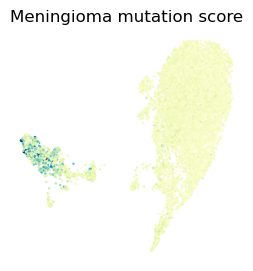

In [37]:
plt.figure(None, (3,3))
with loompy.connect(human_adult_harmony_B_H_cells, 'r') as ds:
    
    plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], c=average_scores8, cmap='YlGnBu', vmax=np.percentile(scores, 99.9), s=3, lw=0, rasterized=True) #, cmap='hot_r', rasterized=True
    plt.axis('off')
    plt.title('Meningioma mutation score', fontsize=12)
    plt.margins(0.05, 0.05)
    #plt.savefig('neftel_plot_adult_menO_p999_average.png',dpi=300)
    plt.show()

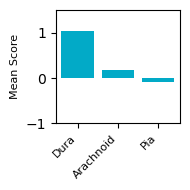

In [30]:
# List of subclasses to plot
subclasses_to_plot = ['Arachnoid', 'Dura', 'Pia']

with loompy.connect(human_adult_harmony_B_H_cells, 'r') as ds:
    scores = average_scores8.flatten()  # Flatten the scores array to 1D
    subclasses = ds.ca.ClassAnn
    
    means_by_subclass = {}  # Dictionary to store mean scores for each subclass
    
    for subclass in subclasses_to_plot:  # Loop over the specified subclasses
        subclass_scores = scores[subclasses == subclass]  # Filter scores for this subclass
        mean_value = np.mean(subclass_scores)  # Calculate the mean for this subclass
        means_by_subclass[subclass] = mean_value  # Store the mean in the dictionary

# Sort the dictionary by mean score in descending order
sorted_means_by_subclass = sorted(means_by_subclass.items(), key=lambda x: x[1], reverse=True)
sorted_subclasses, sorted_mean_scores = zip(*sorted_means_by_subclass)

# Plotting the normalized bar plot for the selected subclasses
plt.figure(figsize=(2,2))
plt.bar(sorted_subclasses, sorted_mean_scores, color='#02AAC7')
plt.ylabel('Mean Score', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylim(-1, 1.5)
plt.yticks(np.arange(-1, 2, 1))
plt.tight_layout()
#plt.savefig('neftel_plot_adult_menO_bar_average.png',dpi=300)
plt.show()